In [1]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import geopandas as gp
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!pip install geopandas

In [3]:
#nrg = gp.GeoDataFrame.from_csv("User/tarekarafat/PUI2017/HW6_tma353/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
#bsize = gp.GeoDataFrame.from_file("User/tarekarafat/PUI2017/HW6_tma353//Manhattan/MNMapPLUTO.shp")
# input data from local drive
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = gp.GeoDataFrame.from_file("mn_mappluto_16v2/MNMapPLUTO.shp")

In [4]:
nrg.columns # col of LL 84 data

Index([u'BBL', u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BIN', u'NTA'],
      dtype=

In [5]:
bsize.columns # PLUTO data

Index([   u'Borough',      u'Block',        u'Lot',         u'CD',
           u'CT2010',     u'CB2010', u'SchoolDist',    u'Council',
          u'ZipCode',   u'FireComp', u'PolicePrct', u'HealthArea',
        u'SanitBoro', u'SanitDistr',   u'SanitSub',    u'Address',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
         u'Overlay1',   u'Overlay2',    u'SPDist1',    u'SPDist2',
          u'SPDist3',  u'LtdHeight',  u'SplitZone',  u'BldgClass',
          u'LandUse',  u'Easements',  u'OwnerType',  u'OwnerName',
          u'LotArea',   u'BldgArea',    u'ComArea',    u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea',  u'StrgeArea',
       u'FactryArea',  u'OtherArea', u'AreaSource',   u'NumBldgs',
        u'NumFloors',   u'UnitsRes', u'UnitsTotal',   u'LotFront',
         u'LotDepth',  u'BldgFront',  u'BldgDepth',        u'Ext',
         u'ProxCode', u'IrrLotCode',    u'LotType',   u'BsmtCode',
       u'AssessLand',  u'AssessTot', u'ExemptLand',  u'ExemptT

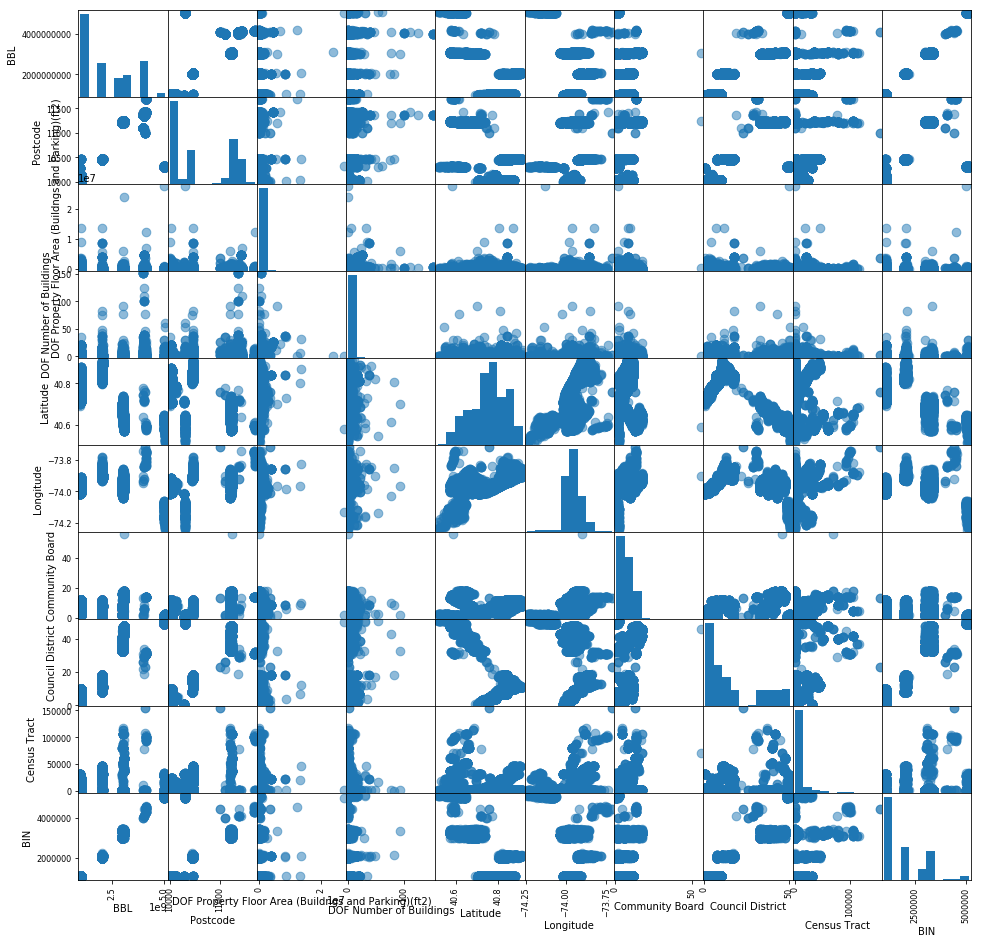

In [6]:
# clean data scatter plot, pandas ignore

from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

In [7]:
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')
nrg['Property ft2'] = pd.to_numeric(
    nrg['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')


In [8]:
# pd.to_numeric(nrg['bsize.BBL.astype'], errors='coerce')

#bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2', 'AreaSource', 
 #           'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass', 'BldgDepth', 'BldgFront', 
 #           'Block', 'BoroCode', 'Borough', 'BsmtCode', 'BuiltCode', 'BuiltFAR', 'CB2010', 
  #          'CD', 'CT2010', 'ComArea', 'CommFAR', 'CondoNo', 'Council', 'EDesigNum', 'Easements', 
   #         'ExemptLand', 'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea', 
    #        'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot', 'LotArea', 'LotDepth', 
     #       'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F', 'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 
      #      'Overlay1', 'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct', 'ProxCode', 'ResArea', 
       #     'ResidFAR', 'RetailArea', 'SHAPE_Area', 'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 
        #    'SanitDist', 'SanitSub', 'SchoolDistr', 'SplitZone', 'StrgeArea', 'TaxMap', 'Tract2010', 'Version', 
         #   'XCoord', 'YCoord', 'YearAlter1', 'YearAlter2', 'ZMCode', 'ZipCode', 'ZoneDist1', 'ZoneDist2', 
          #  'ZoneDist3', 'ZoneDist4', 'ZoneMap', 'geometry'], axis=1, inplace=True)


In [9]:
print (nrg['Site EUI(kBtu/ft2)'].astype(float)) # NaN

Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
13804      NaN
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


In [10]:
print(bsize.BBL.astype(float))

0        1.000010e+09
1        1.000090e+09
2        1.000158e+09
3        1.000130e+09
4        1.000010e+09
5        1.000010e+09
6        1.000130e+09
7        1.000090e+09
8        1.000030e+09
9        1.000120e+09
10       1.000030e+09
11       1.000168e+09
12       1.000160e+09
13       1.000030e+09
14       1.000120e+09
15       1.000030e+09
16       1.000030e+09
17       1.000130e+09
18       1.000090e+09
19       1.000090e+09
20       1.000300e+09
21       1.000328e+09
22       1.000318e+09
23       1.000080e+09
24       1.000290e+09
25       1.000290e+09
26       1.000390e+09
27       1.000020e+09
28       1.000350e+09
29       1.000070e+09
             ...     
42656    1.008968e+09
42657    1.010778e+09
42658    1.010478e+09
42659    1.013428e+09
42660    1.014298e+09
42661    1.014738e+09
42662    1.018878e+09
42663    1.018438e+09
42664    1.016308e+09
42665    1.018318e+09
42666    1.019448e+09
42667    1.018448e+09
42668    1.019438e+09
42669    1.019448e+09
42670    1

In [11]:
nrg.head()

,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA,Property ft2
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918919.0
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64200.0
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...,NaN
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0


In [12]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1,201,101,1,1000,02,1,10004,E007,...,10101,None,0.000000e+00,None,1,16V2,0,6306.265838,1.148541e+06,"POLYGON ((973154.7117999941 194614.3315999955,..."
1,MN,9,14,101,9,1013,02,1,10004,L015,...,10101,None,1.000090e+09,12/26/1985,1,16V2,0,686.230174,2.373306e+04,"POLYGON ((980492.3622000068 195423.9451999962,..."
2,MN,15,7501,101,13,2005,02,1,10004,E010,...,10101,None,1.000150e+09,12/29/1998,1,16V2,7,1098.925676,6.753824e+04,"POLYGON ((979999.0820000023 196493.2800000012,..."
3,MN,13,5,101,13,2008,02,1,10004,E010,...,10101,None,0.000000e+00,None,1,16V2,0,709.632239,3.068607e+04,"POLYGON ((980424.4003999978 196274.334800005, ..."
4,MN,1,10,101,5,1018,02,1,10004,E007,...,10101,None,0.000000e+00,None,1,16V2,0,12277.830569,7.550344e+06,"POLYGON ((979561.8711999953 191884.2495999932,..."


In [13]:
indx = np.isnan(nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Reported Property Floor Area (Building(s)) (ft²)']]) # how many miss values?
print ("invalid entries changed to NaN %d"%sum(indx))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [14]:
indx = np.isnan(bsize['NumFloors', 'UnitsRes', 'UnitsTotal', 'YearBuilt', 'BuiltFAR', 'BBL']] # how many miss values?
print ("invalid entries changed to NaN %d"%sum(indx)) # how many cols

SyntaxError: invalid syntax (<ipython-input-14-8354d167175a>, line 1)

In [15]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010201.0, 1000410001.0)

In [16]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1237: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


(0, 119)

In [17]:
nrg = nrg[['BBL', 'Site EUI(kBtu/ft2)', 'Property ft2']] # only relevant LL 84 
bsize = bsize[['BBL', 'UnitsRes', 'UnitsTotal', 'YearBuilt']] # only relevant PLUTO

In [18]:
#How many missing values
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))
#do it for however many columns you need

invalid entries changed to NaN 4623


In [19]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL')#.dropna()
bblnrgdata.shape

(6476, 6)

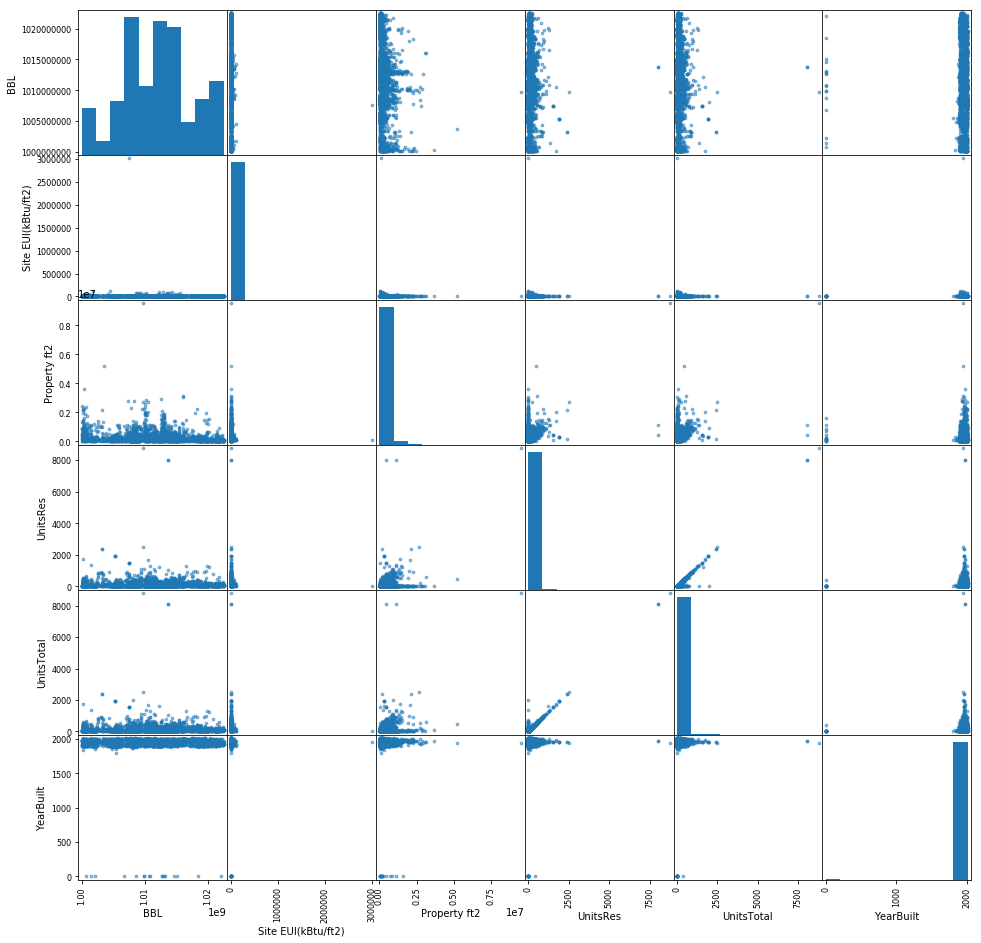

In [20]:
# nrg.rename.
# merge data sets
bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()

# Now the scatter matrix plot should show more columns.
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16));

In [21]:
bblnrgdata['nrg'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Property ft2'] # mult energy by size for energy
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Property ft2,UnitsRes,UnitsTotal,YearBuilt,nrg
2,1.013110e+09,125.4,330000.0,0,56,1977,41382000.0
10,1.010140e+09,154.9,841709.0,0,2,1999,130380724.1
15,1.007660e+09,122.3,59468.0,0,8,1912,7272936.4
16,1.008150e+09,117.0,364000.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,235370.0,0,24,1926,19323877.0


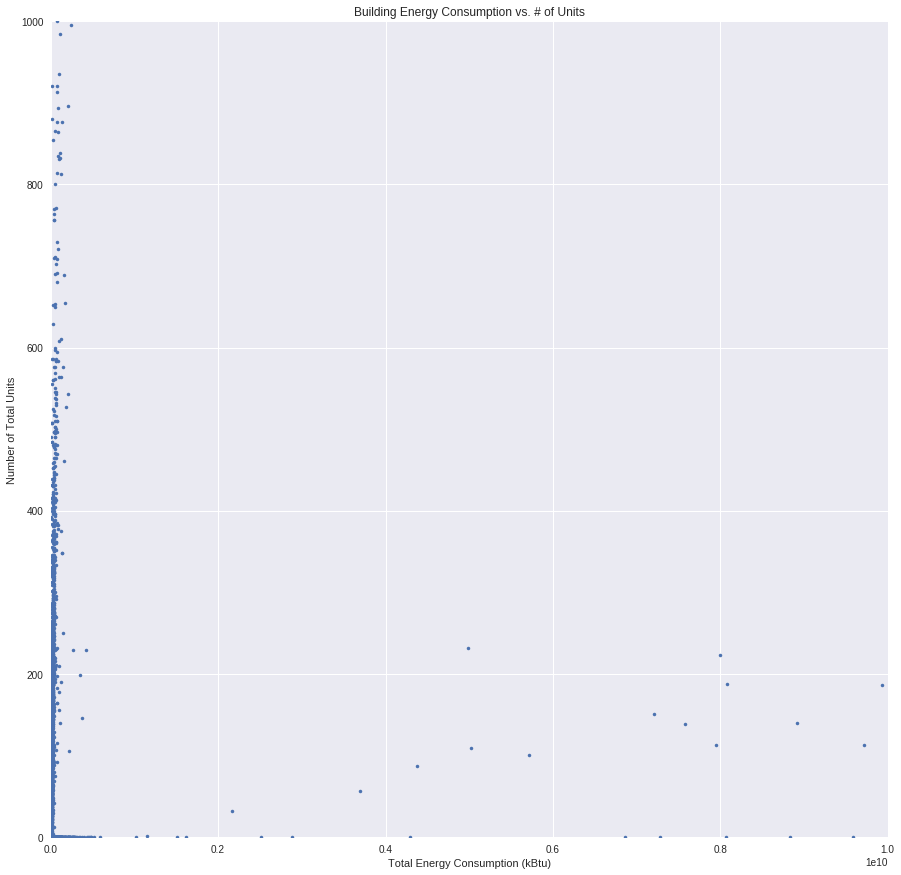

In [22]:
pl.style.use('seaborn') # plot styles
pl.figure(figsize=[15,15])
pl.plot(bblnrgdata['nrg'],bblnrgdata['UnitsRes'], '.')
pl.xlim(0,1e10)
pl.ylim(0,1000)
pl.xlabel('Total Energy Consumption (kBtu)')
pl.ylabel('Number of Total Units')
pl.title('Building Energy Consumption vs. # of Units')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


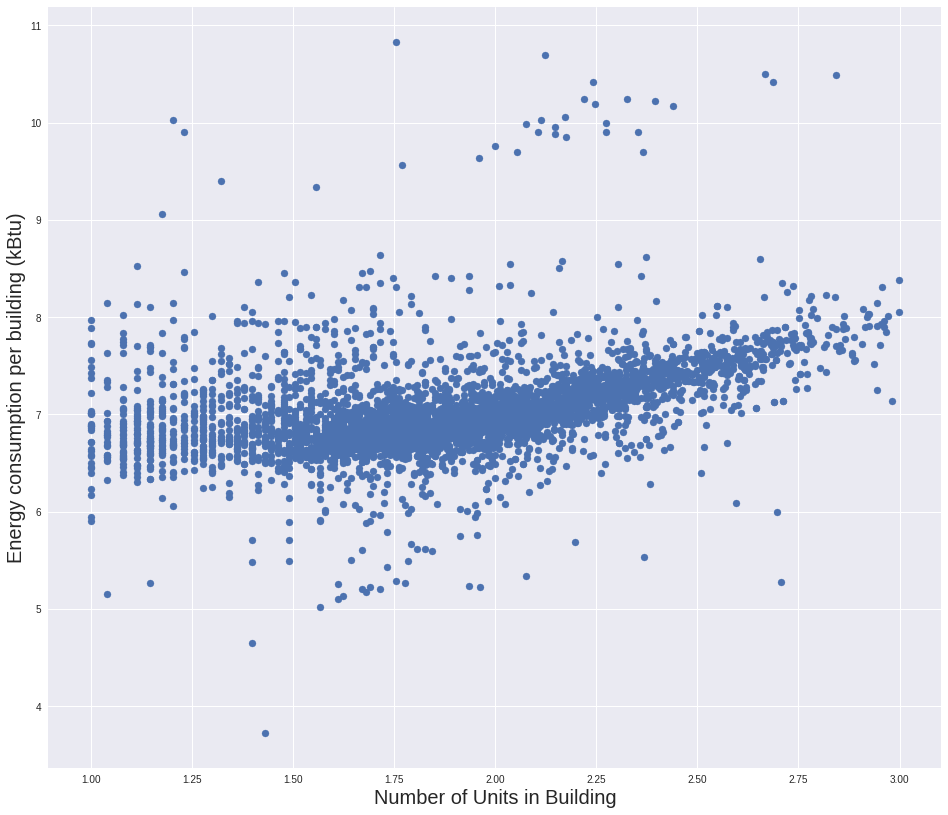

In [23]:
bblnrgdataCut = bblnrgdata[(bblnrgdata.nrg > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

pl.figure(figsize=[16,14])
pl.scatter(x=np.log10(bblnrgdataCut['UnitsTotal']), y=np.log10(bblnrgdataCut['nrg']))
pl.xlabel("Number of Units in Building", fontsize=20)
pl.ylabel("Energy consumption per building (kBtu)", fontsize=20)

In [24]:
# Create OLS model
X = sm.add_constant(np.log10(bblnrgdataCut['UnitsTotal']))
linmodel = sm.OLS(np.log10(bblnrgdataCut['nrg']), X, missing='drop').fit()
lm = linmodel.fittedvalues

In [25]:
# OLS summ
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.2
Date:                Sun, 26 Nov 2017   Prob (F-statistic):          2.05e-166
Time:                        18:30:26   Log-Likelihood:                -2563.5
No. Observations:                4266   AIC:                             5131.
Df Residuals:                    4264   BIC:                             5144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1110      0.033    187.012      0.000         6.047     6.175
UnitsTotal     0.4882      0.017     28.761      0.000         0.455     0.521
==============================================================================
Omnibus:                     2264.923   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44888.937
Skew:                           2.089   Prob(JB):                         0.00
Kurtosis:                      18.333   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

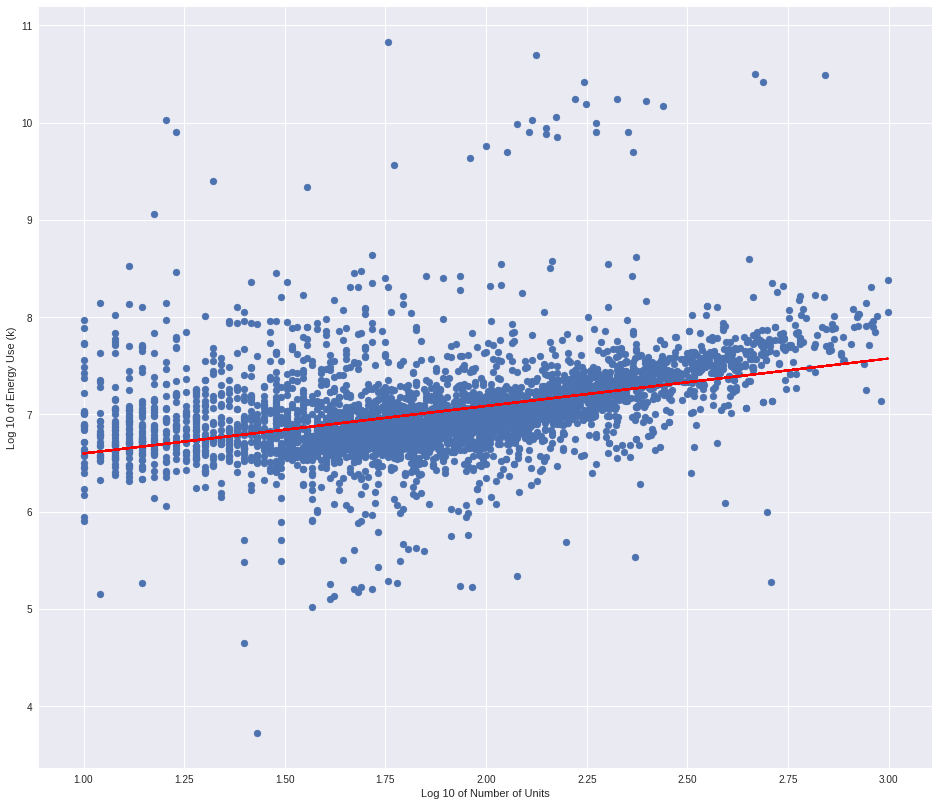

In [26]:
# Plot OLS line and scatter plot
pl.figure(figsize=[16,14])
pl.plot(np.log10(bblnrgdataCut['UnitsTotal']), lm, color='red')
pl.scatter(x=np.log10(bblnrgdataCut['UnitsTotal']), y=np.log10(bblnrgdataCut['nrg']))
pl.xlabel('Log 10 of Number of Units')
pl.ylabel('Log 10 of Energy Use (k)')

In [27]:
# Create OLS model for opposite - energy vs. units
X_2 = sm.add_constant(np.log10(bblnrgdataCut['nrg']))
linmodel_2 = sm.OLS(np.log10(bblnrgdataCut['UnitsTotal']), X_2, missing='drop').fit()
lm_2 = linmodel_2.fittedvalues

In [28]:
# OLS2 summ
linmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.2
Date:                Sun, 26 Nov 2017   Prob (F-statistic):          2.05e-166
Time:                        18:30:26   Log-Likelihood:                -1746.4
No. Observations:                4266   AIC:                             3497.
Df Residuals:                    4264   BIC:                             3510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4563      0.082     -5.596      0.000        -0.616    -0.296
nrg            0.3328      0.012     28.761      0.000         0.310     0.356
==============================================================================
Omnibus:                      149.498   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.251
Skew:                          -0.464   Prob(JB):                     1.31e-36
Kurtosis:                       3.260   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

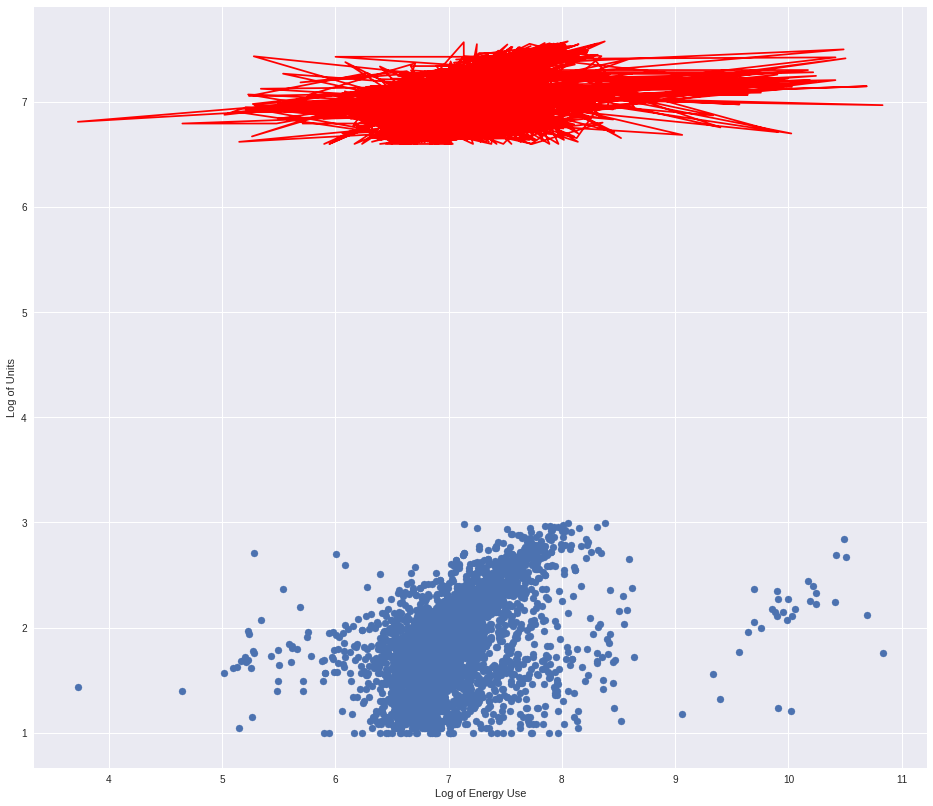

In [29]:
# Plot OLS line and scatter plot
pl.figure(figsize=[16,14])
pl.plot(np.log10(bblnrgdataCut['nrg']), lm, color='red')
pl.scatter(x=np.log10(bblnrgdataCut['nrg']), y=np.log10(bblnrgdataCut['UnitsTotal']))
pl.xlabel('Log of Energy Use')
pl.ylabel('Log of Units')

In [30]:
# generate errors w/Feds samples
errorsnrg = np.sqrt((bblnrgdataCut['Property ft2'])**2 +\
                (bblnrgdataCut['Site EUI(kBtu/ft2)']**2))
errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

#Log errors
errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.nrg / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
def chi2(data, model, errors = None): # chi sq
    '''Calc the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [32]:
print("Units vs. energy chi-square statistic: {:.2f}"\
      .format(chi2(np.log10(bblnrgdataCut['UnitsTotal']), lm, bblnrgdataCut['errorsunits'])))
print("Energy vs. units chi-square statistic: {:.2f}"\
      .format(chi2(np.log10(bblnrgdataCut['nrg']), lm_2, bblnrgdataCut['errorsnrg'])))
print("\nUnits vs. energy is lower, as expected")

Units vs. energy chi-square statistic: 65084115.64
Energy vs. units chi-square statistic: 20913930601944.14

Units vs. energy is lower, as expected


In [33]:
# Create mini dataframe for Statsmodels.Formula.API model
df_ = bblnrgdataCut[['nrg', 'UnitsTotal']]

# define quadratic model
qm = smf.ols("nrg ~ UnitsTotal + I(UnitsTotal**2)", data = df_).fit()

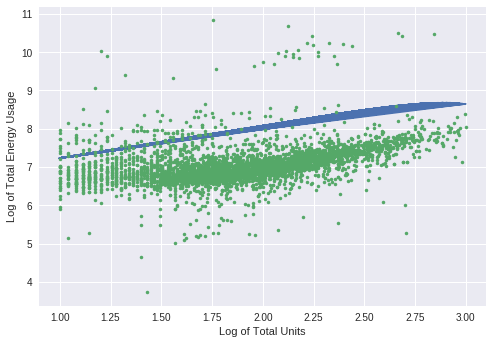

In [34]:
# plot with polynomial model
qm_fit = qm.fittedvalues
pl.plot(np.log10(df_['UnitsTotal']), np.log10(qm_fit), '-')
pl.plot(np.log10(df_['UnitsTotal']), np.log10(df_['nrg']),'.')
pl.xlabel('Log of Total Units')
pl.ylabel('Log of Total Energy Usage')

In [35]:
# get test parameters results
qm.compare_lr_test(linmodel)

(-188445.87256168874, 1.0, 1.0)

In [36]:
# p-value of 1.0 exceeds significance level alpha = 0.5, do not reject the null hypothesis that 
# polynomial model overfits data compared to earlier simpler linear model

## ASH - Score 100. Extra Credit Missing